In [1]:
## Extrator de características e histograma

import cv2
import numpy as np
import matplotlib.pyplot as plt

def conv(img, kernel):
    """Operação de convolução entre a imagem e um kernel
    """
    kernel_qtdeLinhas, kernel_qtdeColunas = kernel.shape
    
    img_qtdeLinhas, img_qtdeColunas = img.shape
    
    k1 = round(kernel_qtdeLinhas/2)
    k2 = round(kernel_qtdeColunas/2)
    
    W = np.zeros((img_qtdeLinhas, img_qtdeColunas))
    
    for i in range(k1, img_qtdeLinhas-k1):
        for j in range(k2, img_qtdeColunas-k2):
            soma = 0
            for x in range(kernel_qtdeLinhas):
                for y in range(kernel_qtdeColunas):
                    soma = soma + kernel[x,y]*img[(i-k1)+x, (j-k2)+y]
            W[i,j] = soma
    return W

def filtro_sobel(img):
    """Obter o resultado a imagem após aplicar o filtro Sobel
    """
    qtdeLinhas, qtdeColunas = img.shape

    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]) #kernel da derivada em relação a x
    kernel_y = np.array([[1, 2, 1],[0, 0, 0], [-1, -2, -1]]) #kernel da derivada em relação a y

    Wx = conv(img, kernel_x)
    Wy = conv(img, kernel_y)

    Wxy = np.hypot(Wx,Wy)
    Wxy *= 255.0 / np.max(Wxy) #Normalizar
    return Wxy.astype(int)

def calcular_histograma(img):
    """Função para obter o vetor de histograma de uma imagem
    Apenas escala de cinza
    Retorna um vetor de 256 posições com o histograma da imagem
    """
    hist = np.zeros(256)
    qtdeLinhas, qtdeColunas = img.shape
    for i in range(qtdeLinhas):
        for j in range(qtdeColunas):
            hist[img[i,j]] = hist[img[i,j]] + 1
            
    return hist

def lbp(img):
    """Função para obter o Local Binary Pattern (LBP)
    O algoritmo desta função não trata imagens que tenham sofrido rotação ou espelhamento
    """
    qtdeLinhas, qtdeColunas = img.shape
    img2 = np.zeros((qtdeLinhas, qtdeColunas), dtype=int)
    
    for i in range(1, qtdeLinhas-1):
        for j in range(1, qtdeColunas-1):
            A = img[i-1, j]
            B = img[i-1, j+1]
            C = img[i, j+1]
            D = img[i+1, j+1]
            E = img[i+1, j]
            F = img[i+1, j-1]
            G = img[i, j-1]
            H = img[i-1, j-1]
            
            Centro = img[i,j]
            soma = 0
            
            soma += 2**7 if A > Centro else 0
            soma += 2**6 if B > Centro else 0
            soma += 2**5 if C > Centro else 0
            soma += 2**4 if D > Centro else 0
            soma += 2**3 if E > Centro else 0
            soma += 2**2 if F > Centro else 0
            soma += 2**1 if G > Centro else 0
            soma += 2**0 if H > Centro else 0
            
            img2[i,j]  = soma    
            
    return img2

def extrair_caracteristicas(img):
    """Extrai características de uma imagem retornando um histograma
    Os primeiros 256 elementos são o histograma do lbp
    Os últimos 256 elementos são o histograma do Filtro Sobel X e Y
    Retorna um histograma com total de 512 elementos
    """
    img_lbp = lbp(img)
    hist_lbp = calcular_histograma(img_lbp)
    
    img_sobel = filtro_sobel(img)
    hist_sobel = calcular_histograma(img_sobel)
    return np.append(hist_lbp, hist_sobel) #Concatenar os dois histogramas

In [17]:
#Pegar características da base
import os

def distancia(a, b):
    M = len(a)
    soma = 0
    for i in range(M):
        soma = soma + ((a[i]-b[i])**2)
    return np.sqrt(soma) 

hists = []

files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]

with open('hists.txt', 'a') as f:
    for i in files_path:
        diretorio, arquivo = path, filename = os.path.split(i)
        imagem = cv2.imread(arquivo, 0)
        carac = extrair_caracteristicas(imagem)
        hists.append((carac,arquivo))
        str_carac = " ".join(str(x) for x in carac)
        print(arquivo)
        f.write("%s, %s\n" % (str_carac, arquivo)) # Salvar em arquivos o histograma de características das imagens na base
    
print("Concluido")

Dinosaurs1.jpg
Dinosaurs10.jpg
Dinosaurs11.jpg
Dinosaurs12.jpg
Dinosaurs13.jpg
Dinosaurs14.jpg
Dinosaurs15.jpg
Dinosaurs16.jpg
Dinosaurs17.jpg
Dinosaurs18.jpg
Dinosaurs19.jpg
Dinosaurs2.jpg
Dinosaurs20.jpg
Dinosaurs21.jpg
Dinosaurs22.jpg
Dinosaurs23.jpg
Dinosaurs24.jpg
Dinosaurs25.jpg
Dinosaurs26.jpg
Dinosaurs27.jpg
Dinosaurs28.jpg
Dinosaurs29.jpg
Dinosaurs3.jpg
Dinosaurs30.jpg
Dinosaurs31.jpg
Dinosaurs32.jpg
Dinosaurs33.jpg
Dinosaurs34.jpg
Dinosaurs35.jpg
Dinosaurs36.jpg
Dinosaurs37.jpg
Dinosaurs38.jpg
Dinosaurs39.jpg
Dinosaurs4.jpg
Dinosaurs40.jpg
Dinosaurs41.jpg
Dinosaurs42.jpg
Dinosaurs43.jpg
Dinosaurs44.jpg
Dinosaurs45.jpg
Dinosaurs46.jpg
Dinosaurs47.jpg
Dinosaurs48.jpg
Dinosaurs49.jpg
Dinosaurs5.jpg
Dinosaurs50.jpg
Dinosaurs51.jpg
Dinosaurs52.jpg
Dinosaurs53.jpg
Dinosaurs54.jpg
Dinosaurs55.jpg
Dinosaurs56.jpg
Dinosaurs57.jpg
Dinosaurs58.jpg
Dinosaurs59.jpg
Dinosaurs6.jpg
Dinosaurs60.jpg
Dinosaurs61.jpg
Dinosaurs62.jpg
Dinosaurs63.jpg
Dinosaurs64.jpg
Dinosaurs65.jpg
Dinosaurs66.jp

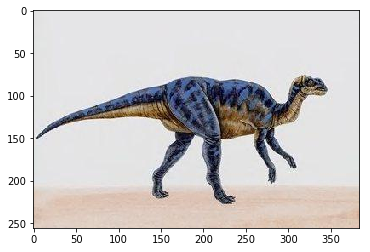

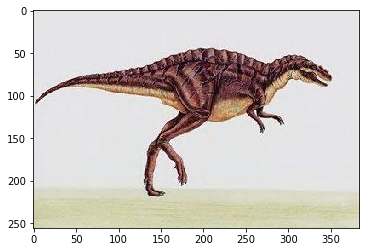

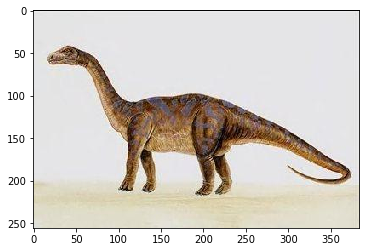

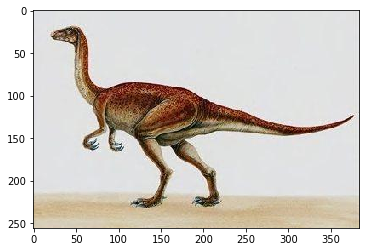

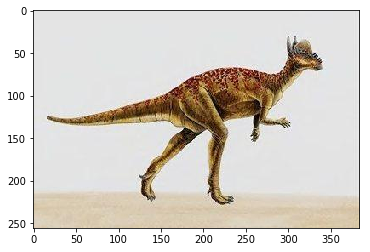

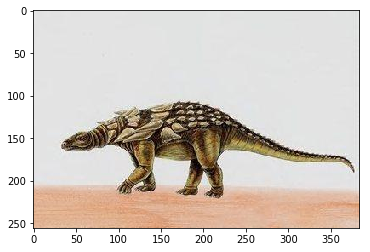

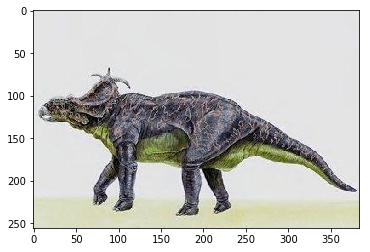

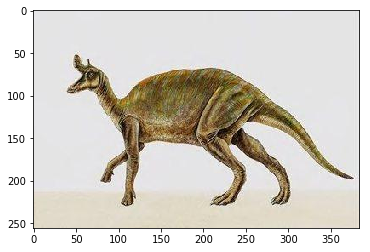

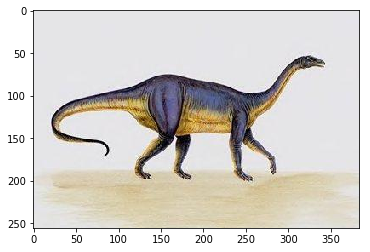

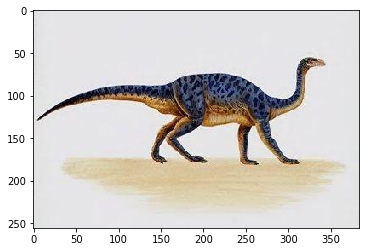

In [19]:
#Procurar imagem semelhante na base

img = cv2.imread('Dinosaurs69.jpg', 0)
hist_consulta = extrair_caracteristicas(img)
d = []

for i in hists:
    d.append((distancia(hist_consulta, i[0]), i[1])) #Calcular distância entre os histogramas

e = sorted(d)

plt.gray()
for i in e[:10]:
    img = cv2.imread(i[1])
    plt.imshow(img[:,:,::-1])
    plt.show()